In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_og = pd.read_csv("data/WineQT.csv", header = 0)
df_clean = pd.read_csv("data/wine quality (clean).csv", header = 0)

## Classification Problem 

Potential models: 
1. Logistic regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier
5. SVM
6. KNN

In [45]:
models = [
    ('Logistic Regression (max_iter = 1000)', LogisticRegression(max_iter = 1000, random_state = 42)),
    ('Logistic Regression', LogisticRegression(random_state = 42)),
    ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    ('Decision Tree (criterion = gini)', DecisionTreeClassifier(criterion = 'gini', random_state = 497)),
    ('Random Forest (n_estimators = 200)', RandomForestClassifier(n_estimators = 200, random_state = 42)),
    ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 42)),
    ('K-Neighbors (n_neighbors = 5)', KNeighborsClassifier(n_neighbors = 5)),
    ('K-Neighbors (n_neighbors = 10)', KNeighborsClassifier(n_neighbors = 10)),
    ('Extra Trees (n_estimators = 200)', ExtraTreesClassifier(n_estimators = 200, random_state = 42)),
    ('SGD Classifier (loss = hinge)', SGDClassifier(loss="hinge", random_state = 42)),
    ('SGD Classifier (loss = modified_huber)', SGDClassifier(loss = 'modified_huber', random_state = 42))
]

In [46]:
X_clean = df_clean[['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density']]
y_clean = df_clean['quality']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [47]:
# visualize
model_names = []
acc_scores = []

for model_name, model in models:
    model.fit(X_train_clean, y_train_clean)
    y_pred = model.predict(X_test_clean)
    
    # visualize
    accuracy = accuracy_score(y_test_clean, y_pred)
    model_names.append(model_name)
    acc_scores.append(accuracy)
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("\n")

/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Model: Logistic Regression (max_iter = 1000)
Accuracy: 0.5905511811023622


Model: Logistic Regression
Accuracy: 0.5984251968503937


Model: Decision Tree
Accuracy: 0.6062992125984252


Model: Decision Tree (criterion = gini)
Accuracy: 0.6377952755905512


Model: Random Forest (n_estimators = 200)
Accuracy: 0.7007874015748031


Model: Random Forest
Accuracy: 0.6850393700787402


Model: Gradient Boosting
Accuracy: 0.5748031496062992


Model: K-Neighbors (n_neighbors = 5)
Accuracy: 0.5669291338582677


Model: K-Neighbors (n_neighbors = 10)
Accuracy: 0.5196850393700787


Model: Extra Trees (n_estimators = 200)
Accuracy: 0.7244094488188977


Model: SGD Classifier (loss = hinge)
Accuracy: 0.4566929133858268


Model: SGD Classifier (loss = modified_huber)
Accuracy: 0.5590551181102362




/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

In [54]:
# convert scores into percentages
acc_scores_percent = []

for score in acc_scores:
    percent_score = score * 100
    acc_scores_percent.append(percent_score)
    
print(acc_scores_percent)

[59.055118110236215, 59.84251968503938, 60.629921259842526, 63.77952755905512, 70.07874015748031, 68.50393700787401, 57.48031496062992, 56.69291338582677, 51.96850393700787, 72.44094488188976, 45.66929133858268, 55.90551181102362]


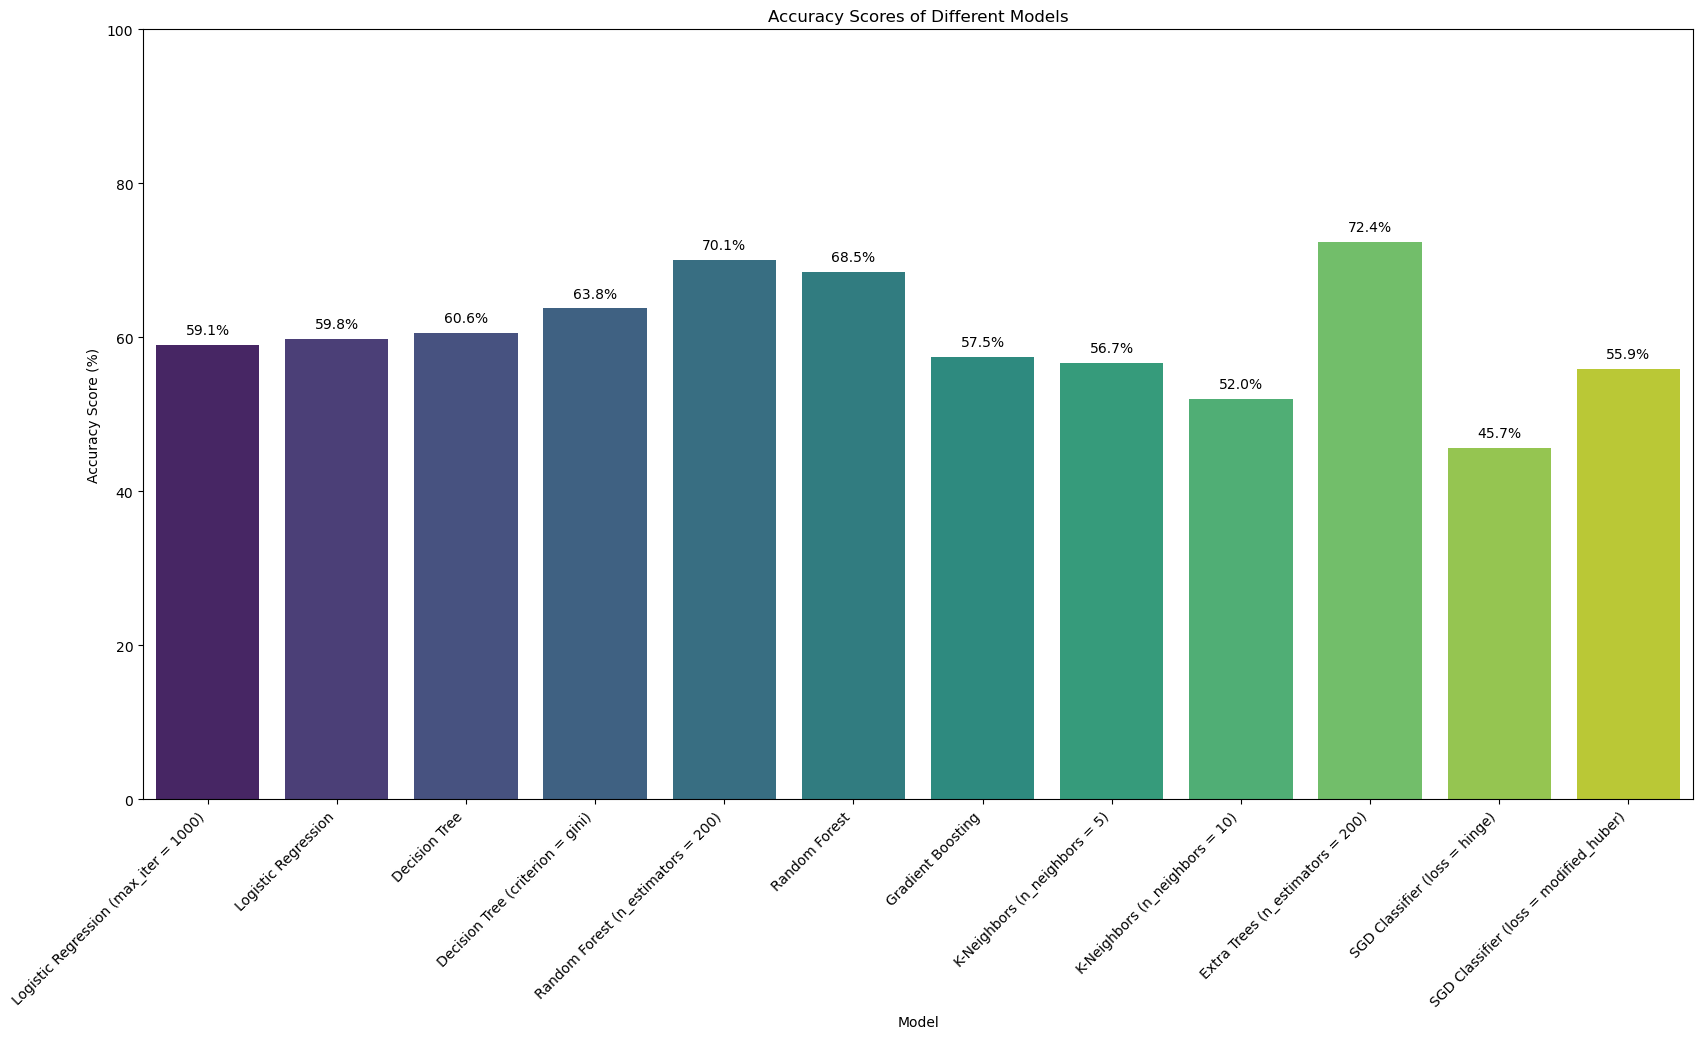

In [56]:
# Create a bar plot of accuracy scores
plt.figure(figsize=(20, 10))
sns.barplot(x = model_names, y = acc_scores_percent, palette = 'viridis')
plt.xticks(rotation = 45, ha = 'right')

plt.ylim(0, 100) 

# Add labels (accuracy scores) to each bar
for i, score in enumerate(acc_scores_percent):
    plt.text(i, score + 1, f'{score:.1f}%', ha='center', va='bottom', fontsize=10)


plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score (%)') 
plt.show()

In [6]:
X_og = df_og[['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density']]
y_og = df_og['quality']

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X_og, y_og, test_size = 0.2, random_state = 42)

In [8]:
for model in models:
    model.fit(X_train_og, y_train_og) # train model
    y_pred = model.predict(X_test_og)
    
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(y_test_og, y_pred))
    print("\n")

/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Model: LogisticRegression
Accuracy: 0.6157205240174672


Model: LogisticRegression
Accuracy: 0.5895196506550219


Model: DecisionTreeClassifier
Accuracy: 0.5414847161572053


Model: DecisionTreeClassifier
Accuracy: 0.5458515283842795


Model: RandomForestClassifier
Accuracy: 0.6812227074235808


Model: RandomForestClassifier
Accuracy: 0.6724890829694323


Model: GradientBoostingClassifier
Accuracy: 0.6462882096069869


Model: KNeighborsClassifier
Accuracy: 0.5676855895196506


Model: KNeighborsClassifier
Accuracy: 0.5633187772925764


Model: ExtraTreesClassifier
Accuracy: 0.6681222707423581




/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

Model: SGDClassifier
Accuracy: 0.37554585152838427


Model: SGDClassifier
Accuracy: 0.026200873362445413




In [11]:
X_og = df_og.drop("quality", axis = 1)
y_og = df_og['quality']

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X_og, y_og, test_size = 0.2, random_state = 42)

In [12]:
for model in models:
    model.fit(X_train_og, y_train_og) # train model
    y_pred = model.predict(X_test_og)
    
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(y_test_og, y_pred))
    print("\n")

/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Model: LogisticRegression
Accuracy: 0.6375545851528385


Model: LogisticRegression
Accuracy: 0.537117903930131


Model: DecisionTreeClassifier
Accuracy: 0.5633187772925764


Model: DecisionTreeClassifier
Accuracy: 0.5545851528384279


Model: RandomForestClassifier
Accuracy: 0.6943231441048034


Model: RandomForestClassifier
Accuracy: 0.6812227074235808


Model: GradientBoostingClassifier
Accuracy: 0.6724890829694323


Model: KNeighborsClassifier
Accuracy: 0.4890829694323144


Model: KNeighborsClassifier
Accuracy: 0.5152838427947598




/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

Model: ExtraTreesClassifier
Accuracy: 0.6899563318777293


Model: SGDClassifier
Accuracy: 0.5327510917030568


Model: SGDClassifier
Accuracy: 0.39737991266375544




In [13]:
X_clean = df_clean.drop("quality", axis = 1)
y_clean = df_clean['quality']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size = 0.2, random_state = 42)

In [14]:
for model in models:
    model.fit(X_train_clean, y_train_clean) # train model
    y_pred = model.predict(X_test_clean)
    
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(y_test_clean, y_pred))
    print("\n")

/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Model: LogisticRegression
Accuracy: 0.5669291338582677


Model: LogisticRegression
Accuracy: 0.5905511811023622


Model: DecisionTreeClassifier
Accuracy: 0.5669291338582677


Model: DecisionTreeClassifier
Accuracy: 0.5905511811023622


Model: RandomForestClassifier
Accuracy: 0.6377952755905512


Model: RandomForestClassifier
Accuracy: 0.6692913385826772


Model: GradientBoostingClassifier
Accuracy: 0.6062992125984252


Model: KNeighborsClassifier
Accuracy: 0.5748031496062992


Model: KNeighborsClassifier
Accuracy: 0.5433070866141733


Model: ExtraTreesClassifier
Accuracy: 0.6299212598425197


Model: SGDClassifier
Accuracy: 0.47244094488188976


Model: SGDClassifier
Accuracy: 0.4645669291338583




/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aliceliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo